## Similaridade Semantica / Processador de Intenções 

Objetivo: Através de similaridade com o frase do usuário, classificar a intenção de ação


## Classificador de Intenções LSTM with Banking 77 DataSet

### Banking DataSet Intention: 

* English
* Aplicar modelo Stemming com Rede Neural LSTM
* Carregar o test e aplicar as validações


In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

In [2]:
# ===== Dataset sintético =====

df = pd.read_csv('banking77/train.csv')
df.head()

,text,category
0,I am still waiting on my card?,card_arrival
1,What can I do if my card still hasn't arrived ...,card_arrival
2,I have been waiting over a week. Is the card s...,card_arrival
3,Can I track my card while it is in the process...,card_arrival
4,"How do I know if I will get my card, or if it ...",card_arrival


In [3]:
df.shape

(10003, 2)

In [4]:
print(f"Quantidade de categorias: {df.category.nunique()}")

Quantidade de categorias: 77


In [5]:
# Codificação das labels
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["category"])
df.head()

,text,category,label
0,I am still waiting on my card?,card_arrival,12
1,What can I do if my card still hasn't arrived ...,card_arrival,12
2,I have been waiting over a week. Is the card s...,card_arrival,12
3,Can I track my card while it is in the process...,card_arrival,12
4,"How do I know if I will get my card, or if it ...",card_arrival,12


## Stemming

In [6]:
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.corpus import wordnet as wn
from tensorflow.keras.preprocessing.text import one_hot
from nltk.stem import RSLPStemmer


nltk.download('rslp')
nltk.download('stopwords')
#print(train_data)
# StopWords
stopwords_pt = set(stopwords.words('english'))

stemmer = RSLPStemmer()

# to lower case
df['text_adjusted'] = df['text'].str.lower()

for index, entry in enumerate(df['text_adjusted']):
    tokens = nltk.word_tokenize(entry, language='english') 
    final_words = []
    for word in tokens:
        if word not in stopwords_pt and word.isalpha():
            final_words.append(stemmer.stem(word))

    df.loc[index, 'text_adjusted_stem'] = ' '.join(final_words)


[nltk_data] Downloading package rslp to
[nltk_data]     /Users/felipemenezes/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/felipemenezes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df[df['label'] == 1].head()

,text,category,label,text_adjusted,text_adjusted_stem
9179,Please help me with my card. It won't activate.,activate_my_card,1,please help me with my card. it won't activate.,pleas help card wo activat
9180,I tired but an unable to activate my card.,activate_my_card,1,i tired but an unable to activate my card.,tired unabl activat card
9181,I want to start using my card.,activate_my_card,1,i want to start using my card.,want start using card
9182,How do I verify my new card?,activate_my_card,1,how do i verify my new card?,verify new card
9183,I tried activating my plug-in and it didn't pi...,activate_my_card,1,i tried activating my plug-in and it didn't pi...,tried activating piec work


In [8]:
df[df['label'] == 3].head()

,text,category,label,text_adjusted,text_adjusted_stem
9644,"Hi, I have an apple watch. How do I use it to ...",apple_pay_or_google_pay,3,"hi, i have an apple watch. how do i use it to ...",hi appl watch use top card
9645,Can I use google pay to top up?,apple_pay_or_google_pay,3,can i use google pay to top up?,use googl pay top
9646,why top up is not working even if I got my Ame...,apple_pay_or_google_pay,3,why top up is not working even if i got my ame...,top working even got american expres appl bay
9647,Can I deposit money using Apple Pay?,apple_pay_or_google_pay,3,can i deposit money using apple pay?,deposit money using appl pay
9648,Can I use google pay for topping -up,apple_pay_or_google_pay,3,can i use google pay for topping -up,use googl pay topping


In [9]:
df[df['label'] == 0].head()

,text,category,label,text_adjusted,text_adjusted_stem
5674,I don't see my refund money yet in my account....,Refund_not_showing_up,0,i don't see my refund money yet in my account....,see refund money yet account asked merchant ag...
5675,Why am I missing my refund,Refund_not_showing_up,0,why am i missing my refund,missing refund
5676,Please help me. I am still waiting on a refund.,Refund_not_showing_up,0,please help me. i am still waiting on a refund.,pleas help still waiting refund
5677,I requested a refund but am unable to see it i...,Refund_not_showing_up,0,i requested a refund but am unable to see it i...,requested refund unabl see account
5678,When will my refund come through,Refund_not_showing_up,0,when will my refund come through,refund com


In [10]:
df[df['label'] == 2].head()

,text,category,label,text_adjusted,text_adjusted_stem
1557,I want to open an account for my children,age_limit,2,i want to open an account for my children,want open account children
1558,How old do you need to be to use the banks ser...,age_limit,2,how old do you need to be to use the banks ser...,old need use bank serv
1559,Whats the minimum age to have an account,age_limit,2,whats the minimum age to have an account,what minimum age account
1560,Can my children open an account?,age_limit,2,can my children open an account?,children open account
1561,How old do I need to be?,age_limit,2,how old do i need to be?,old need


In [11]:
# Remove duplicates 
print(df.shape)
df_stem = df.drop_duplicates(subset=['text_adjusted_stem'])
df_stem.shape

(10003, 5)


(8938, 5)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [13]:
from tensorflow.keras.utils import to_categorical
# ===== 2. Tokenização =====
vocab_size = 5000
tokenizer2 = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer2.fit_on_texts(df["text_adjusted_stem"])
sequences = tokenizer2.texts_to_sequences(df["text_adjusted_stem"])
#max_len = max(len(s) for s in sequences)  # tamanho máximo das frases
#onehot_repr=[one_hot(words, vocab_size) for words in df["texto_final_stem"]] 
max_len = int(np.percentile([len(s) for s in sequences], 95))
X = pad_sequences(sequences, maxlen=max_len, padding='post')
y = df["label"].values
#print(y)

# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# ===== Modelo LSTM =====
voc_size = len(tokenizer2.word_index) + 1
embedding_vector_features = 20

model = Sequential()
model.add(Embedding(voc_size, embedding_vector_features))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, len(label_encoder.classes_)))
print(model.summary())

# ===== Treino =====
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=64,shuffle=True
)

2025-09-02 20:50:49.661722: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-09-02 20:50:49.661759: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-09-02 20:50:49.661762: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1756857049.661778 7338529 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1756857049.661798 7338529 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 77, 20)         │        39,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        43,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 77)             │         9,933 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,973 (363.18 KB)

 Trainable params: 92,973 (363.18 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15


2025-09-02 20:50:50.708462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


110/110 ━━━━━━━━━━━━━━━━━━━━ 13s 77ms/step - accuracy: 0.0239 - loss: 4.3277 - val_accuracy: 0.0673 - val_loss: 4.0190
Epoch 2/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.0984 - loss: 3.6538 - val_accuracy: 0.2559 - val_loss: 2.7705
Epoch 3/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.2791 - loss: 2.6026 - val_accuracy: 0.4182 - val_loss: 2.1494
Epoch 4/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.4311 - loss: 2.0284 - val_accuracy: 0.5312 - val_loss: 1.7893
Epoch 5/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.5687 - loss: 1.6018 - val_accuracy: 0.6168 - val_loss: 1.5038
Epoch 6/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.6419 - loss: 1.3063 - val_accuracy: 0.6375 - val_loss: 1.3421
Epoch 7/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.7086 - loss: 1.1031 - val_accuracy: 0.6758 - val_loss: 1.2376
Epoch 8/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.7372 - loss: 0.9881 - val_accuracy: 0.69

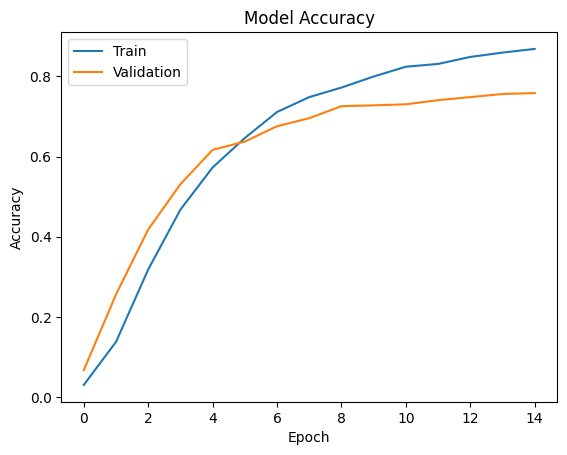

In [14]:
print(history)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:

# ===== 7. Avaliação =====
loss, acc = model.evaluate(X_test, y_test)
print(f"\nAcurácia no teste: {acc:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7593 - loss: 0.9229

Acurácia no teste: 0.7584


In [16]:
# ===== 8. Testando previsão =====
nova_frase = ["could use google play to top up?".lower()]
nova_frase = [word_tokenize(entry, language='english') for entry in nova_frase]

final_words = []
for word in nova_frase[0]:
        if word not in stopwords_pt and word.isalpha():
            final_words.append(stemmer.stem(word))

print(final_words)

seq = tokenizer2.texts_to_sequences([final_words])
padded = pad_sequences(seq, maxlen=max_len, padding='post')

# Faz predição
pred = model.predict(padded)[0] 

print(pred)

# Obtém índice da classe com maior probabilidade
classe_idx = np.argmax(pred)
prob = pred[classe_idx]

print(prob)

print("\nFrase:", nova_frase[0])
print("Classe prevista:", label_encoder.inverse_transform([classe_idx]))
print("Probabilidade:", prob)

['could', 'use', 'googl', 'play', 'top']
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 841ms/step
[1.0251818e-07 2.6526579e-09 3.5559780e-05 9.9864084e-01 2.3583837e-06
 3.6808282e-07 1.5877591e-08 5.3514069e-09 2.3588582e-06 2.7830322e-06
 6.3951855e-10 1.2274285e-06 1.6648460e-08 7.5990870e-06 3.6683015e-10
 4.1846565e-06 2.3925479e-06 2.2661109e-08 2.3816830e-07 7.6290760e-08
 4.9006834e-05 5.8130740e-06 8.8439674e-06 1.7789863e-06 7.7833562e-07
 1.1444787e-06 1.0604268e-06 1.0889020e-05 7.6664337e-06 1.0831774e-07
 4.6778052e-08 2.0944076e-06 5.5710746e-08 2.9048326e-07 1.0889010e-07
 1.2783586e-07 1.9530638e-05 1.7238333e-06 2.5016422e-07 3.8408023e-05
 4.5841880e-08 6.4551466e-07 1.5600127e-08 1.2570078e-05 1.3703450e-07
 3.7170175e-04 1.2191564e-09 1.5074061e-08 1.0037358e-07 1.4840699e-08
 3.2095343e-04 6.6127148e-05 2.7786693e-06 8.2871132e-08 5.9284419e-05
 1.3612846e-05 1.8739582e-05 1.1805759e-05 5.8112360e-05 6.6398185e-05
 3.1021118e-05 4.4508238e-06 1.8592027e-05 1.7693453e-06 1.0501436e-

In [17]:

# ==== Dataset de teste ====
dfSample = pd.read_csv('banking77/test.csv')
dfSample.head()


,text,category
0,How do I locate my card?,card_arrival
1,"I still have not received my new card, I order...",card_arrival
2,I ordered a card but it has not arrived. Help ...,card_arrival
3,Is there a way to know when my card will arrive?,card_arrival
4,My card has not arrived yet.,card_arrival


In [18]:
dfSample = dfSample.sample(n=10)
dfSample.shape

(10, 2)

In [19]:
def prever_classe(texto):
    frase_proc = word_tokenize(texto.lower(), language='english')
    
    final_words = [
        stemmer.stem(word) 
        for word  in frase_proc 
        if word not in stopwords_pt and word.isalpha()
    ]
    
    # Sequência → padding
    seq = tokenizer2.texts_to_sequences([final_words])
    padded = pad_sequences(seq, maxlen=max_len, padding='post')
    
    # Predição
    pred = model.predict(padded, verbose=0)[0]
    classe_idx = np.argmax(pred)
    prob = pred[classe_idx]
    classe = label_encoder.inverse_transform([classe_idx])[0]
    return classe, prob


In [20]:
# ==== Preencher previsões ====
dfSample["label_pred"] = dfSample["text"].apply(
    lambda x: prever_classe(x)[0]
)
dfSample["prob"] = dfSample["text"].apply(
    lambda x: prever_classe(x)[1]
)

print(dfSample)

                                                   text  \
2202  Is there a reason I was charged a fee to trans...   
813     What is the fee charged with this card payment?   
69    Can you please show me where I can find the lo...   
1222    I am having difficulties to verify my identity.   
2288                Why did my transfer not go through?   
301     Ordered awhile back, what is the ETA in the US?   
1640                                My phone was stolen   
3053             how do i get a card if i am in the usa   
1911                        How do I delete my account?   
329   I'm going to be away for awhile, can I have it...   

                       category                label_pred      prob  
2202       transfer_fee_charged      transfer_fee_charged  0.950212  
813    card_payment_fee_charged  card_payment_fee_charged  0.969374  
69                 card_linking              card_linking  0.958493  
1222  unable_to_verify_identity        verify_my_identity  0.462007  


## Confusion Matrix

In [21]:
y_pred1=np.argmax(model.predict(X_test), axis=-1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7584138620459847

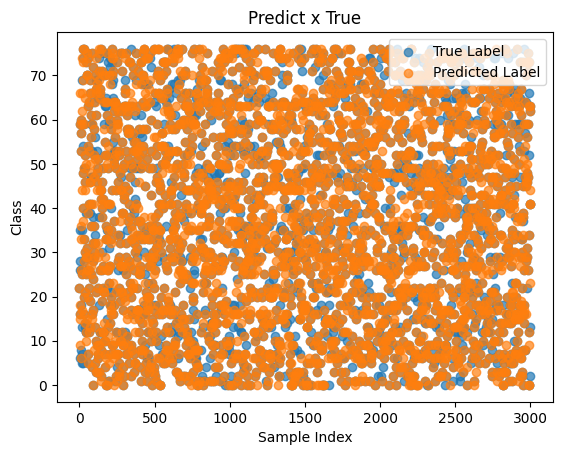

In [23]:
%matplotlib inline
x = range(len(y_test)) 
plt.scatter(x, y_test, label='True Label', alpha=0.7)
plt.scatter(x, y_pred1, label='Predicted Label', alpha=0.7)
plt.title('Predict x True')
plt.ylabel('Class')
plt.xlabel('Sample Index')
plt.legend(loc='upper right')
plt.show()

(<Figure size 1000x1000 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

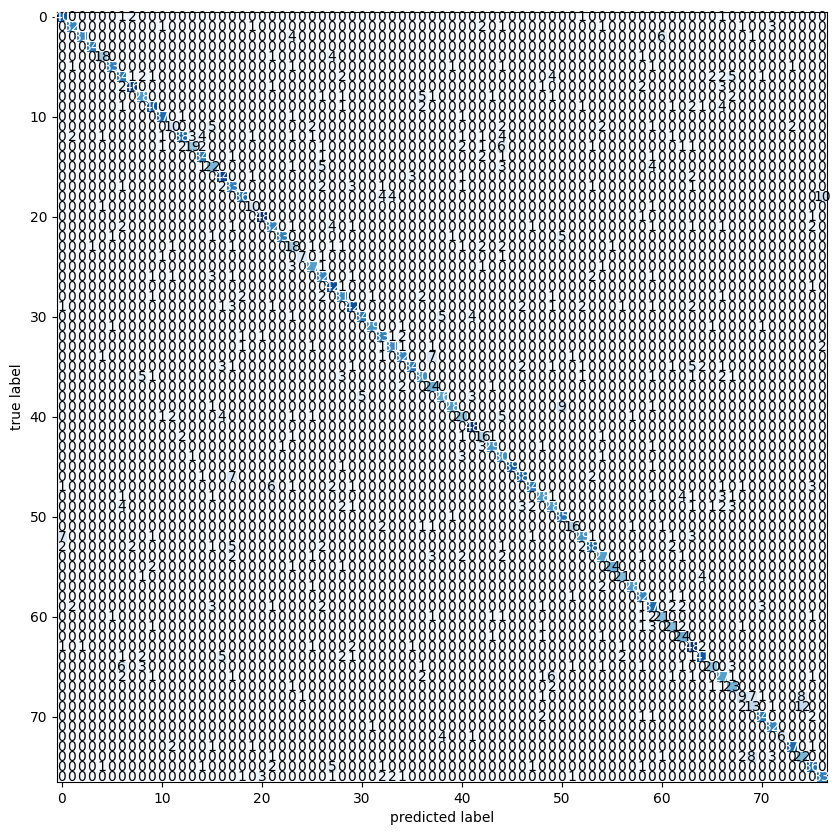

In [24]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm= confusion_matrix(y_test,y_pred1)
plot_confusion_matrix(cm, figsize=(10,10))

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred1, target_names=label_encoder.classes_))

                                                  precision    recall  f1-score   support

                           Refund_not_showing_up       0.77      0.89      0.82        45
                                activate_my_card       0.86      0.76      0.81        42
                                       age_limit       0.97      0.74      0.84        42
                         apple_pay_or_google_pay       0.97      1.00      0.99        34
                                     atm_support       0.82      0.75      0.78        24
                                automatic_top_up       0.92      0.85      0.88        39
         balance_not_updated_after_bank_transfer       0.62      0.63      0.62        54
balance_not_updated_after_cheque_or_cash_deposit       0.90      0.84      0.87        55
                         beneficiary_not_allowed       0.68      0.70      0.69        40
                                 cancel_transfer       0.82      0.75      0.78        53
         

## Extraindo Intenção Completa 

## Save Model, tokenizer e Label Encode


In [26]:
model.save("sematica_lstm77.h5")

In [27]:
import pickle
# depois de treinar seu tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer2, f)